# **Projet: Data Analysis**


---



---
Library setup: importing models libraries and others for dataframes management like pandas ... etc.




---

In [ ]:
import pandas as pd
from sklearn import metrics
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from statistics import mode 
from sklearn.metrics import f1_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/new_Base_CDM_balanced_V2.csv', sep=';')
# Printing out the first 5 rows of the dataframe

df.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat


#I - Preparing Data :

---

Deleting the first row because it contains just the columns names 

---

In [ ]:
df = df.iloc[1:]
df.reset_index(drop=True, inplace=True)

---

Let's list the data types for each column

---

In [ ]:
df.dtypes

Y     object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X7    object
dtype: object

---

We can see that  X1, X2, X3, X4, X6 should be numerics instead of objects (strings). For that we have to convert them to numerics

----

In [ ]:
for col in ['X1', 'X2', 'X3', 'X4', 'X6']:
  df[col] = pd.to_numeric(df[col])

---

We can see now that we have numerical values


In [ ]:
df.dtypes

Y      object
X1    float64
X2    float64
X3      int64
X4      int64
X5     object
X6    float64
X7     object
dtype: object

---
    
    
  Descriptive statistics include those that summarize the central tendency, dispersion, and shape of the distribution of a data set, excluding NaN values.

---

According to this table we can see that Q1(25%) is 2 and the min value is 2, same thing for Q2(75)% is 11 and the max value is 1475, which means we don't have outliers 

In [ ]:
df.describe()

,X1,X2,X3,X4,X6
count,25782.000000,25782.000000,25782.000000,25782.000000,25782.000000
mean,13.767151,130.888312,64641.184431,37.646614,587.855260
std,38.203406,372.649805,54924.645702,23.498949,1821.338396
min,1.000000,1.110000,1693.000000,1.000000,1.000000
25%,2.000000,13.360000,21394.000000,25.000000,50.000000
50%,4.000000,31.050000,51522.000000,32.000000,120.000000
75%,11.000000,87.450000,91000.000000,40.000000,380.000000
max,1475.000000,13589.220000,284844.000000,198.000000,48816.000000


---

Let's see now how many missing values foreach column.

---

We can see that we don't have missing values 

In [ ]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Y
False    25782
Name: Y, dtype: int64

X1
False    25782
Name: X1, dtype: int64

X2
False    25782
Name: X2, dtype: int64

X3
False    25782
Name: X3, dtype: int64

X4
False    25782
Name: X4, dtype: int64

X5
False    25782
Name: X5, dtype: int64

X6
False    25782
Name: X6, dtype: int64

X7
False    25782
Name: X7, dtype: int64



---

Convert Y column from ['No_Displ','Displ'] values to [0, 1]. The same thing is for the feature column, from ['No_Feat','Feat'] to [0, 1].

---

In [ ]:
df['Y'] = df['Y'].replace(['No_Displ','Displ'],[0, 1])
df['X7'] = df['X7'].replace(['No_Feat','Feat'],[0, 1])

---
 
Changing the categorical values to numerical on X5 column.

---

In [ ]:
#using get_dummies to get numerical. 
dummy_variable_1 = pd.get_dummies(df["X5"])
dummy_variable_1.head()

,AUCHAN,CARREFOUR,CARREFOUR MARKET,CASINO,CORA,ECOMARCHE,FRANPRIX,GEANT,HYPER U,INTERMARCHE,LECLERC,MARCHE U,MATCH,MONOPRIX,OTHERS,PRISUNIC,SHOPI,SIMPLY MARKET,SUPER U
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---

We have to concat new categorical columns to the data and removing the old X5 column.

---

In [ ]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([dummy_variable_1,df], axis=1)

# drop original column "fuel-type" from "df"
df.drop("X5", axis = 1, inplace=True)
df.reset_index(drop=True, inplace=True)

---

New data

In [ ]:
df.head()

,AUCHAN,CARREFOUR,CARREFOUR MARKET,CASINO,CORA,ECOMARCHE,FRANPRIX,GEANT,HYPER U,INTERMARCHE,LECLERC,MARCHE U,MATCH,MONOPRIX,OTHERS,PRISUNIC,SHOPI,SIMPLY MARKET,SUPER U,Y,X1,X2,X3,X4,X6,X7
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,20.20,47400,36,72.0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0,11.90,62000,24,48.0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,29.52,60661,60,480.0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,16.20,59677,19,38.0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,62.10,142602,50,250.0,0


---

devide data to X variables and Y the target variable

---

In [ ]:
X = df.loc[:, df.columns != ("Y")]
Y = df['Y'] 
scale= StandardScaler()
Xscale = scale.fit_transform(X)

---

Let's verify that our data is balanced 

---

In [ ]:
df['Y'].value_counts()

0    13000
1    12782
Name: Y, dtype: int64

# II- MDLPC Discretization

---

Discrétisation utilisant le principe de longueur de description minimale. Cette fonction discrétise les attributs continus de la matrice de données en utilisant le critère d'entropie avec la longueur de description minimale comme règle d'arrêt. 

---

Discretization is the process through which we can transform continuous variables, models or functions into a discrete form. We do this by creating a set of contiguous intervals (or bins) that go across the range of our desired variable/model/function.

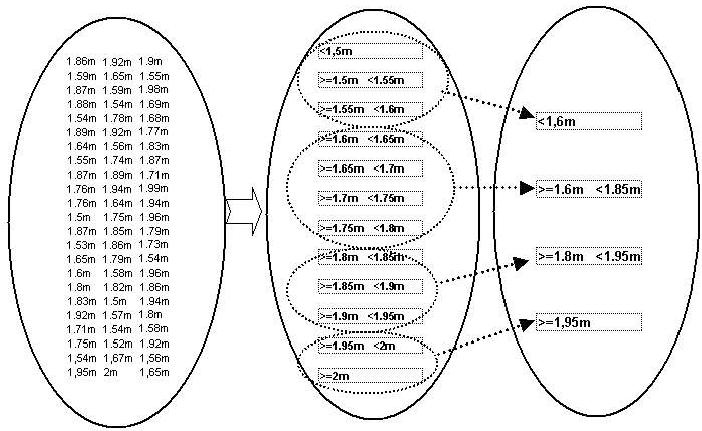

In [ ]:
import os
import sys
sys.path.insert(0, os.path.abspath('/content/MDLPC'))

In [ ]:
from MDLP import MDLP_Discretizer

In [ ]:
X.values

array([[  0.,   0.,   0., ...,  36.,  72.,   0.],
       [  0.,   0.,   0., ...,  24.,  48.,   0.],
       [  1.,   0.,   0., ...,  60., 480.,   0.],
       ...,
       [  0.,   0.,   1., ...,  35., 420.,   0.],
       [  0.,   0.,   1., ...,  24., 120.,   0.],
       [  0.,   0.,   1., ...,  40., 200.,   0.]])

In [ ]:
numeric_features = np.arange(X.shape[1]) 
discretizer = MDLP_Discretizer(features=numeric_features)
discretizer.fit(X.values, Y.values)
X_MDLPC = discretizer.transform(X.values)
X_MDLPC 

array([[ 0.,  0.,  0., ...,  9.,  4.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 1.,  0.,  0., ..., 15.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  9.,  8.,  0.],
       [ 0.,  0.,  0., ...,  1.,  5.,  0.],
       [ 0.,  0.,  0., ...,  9.,  6.,  0.]])

#  III- Modeling :

---

Splitting the data into train and test set.

---

In [ ]:
x_MDLPC_train, x_MDLPC_test, y_train, y_test = train_test_split(X_MDLPC, Y, test_size=0.20, random_state=4)
x_train, x_test, y_train, y_test = train_test_split(Xscale, Y, test_size=0.20, random_state=4)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 5157
number of training samples: 20625


## Evaluations 

**True/False Positives and Negatives :** 

binary classifier can be viewed as classifying instances as positive or negative:

**Positive:** The instance is classified as a member of the class the classifier is trying to identify. For example, a classifier looking for cat photos would classify photos with cats as positive (when correct).

**Negative:** The instance is classified as not being a member of the class we are trying to identify. For example, a classifier looking for cat photos should classify photos with dogs (and no cats) as negative.

**True Positive (TP) :** 
The following table shows 3 examples of a True Positive (TP). The first row is a generic example, where 1 represents the Positive prediction. The following two rows are examples with labels. Internally, the algorithms would use the 1/0 representation, but I used labels here for a more intuitive understanding.

**False Positive (FP) :**
These False Positives (FP) examples illustrate making wrong predictions, predicting Positive samples for a actual Negative samples. Such failed prediction is called False Positive.

**True Negative (TN):**
For the True Negative (TN) example, the cat classifier correctly identifies a photo as not having a cat in it, and the medical image as the patient having no cancer. So the prediction is Negative and correct (True).


**False Negative (FN):**
In the False Negative (FN) case, the classifier has predicted a Negative result, while the actual result was positive. Like no cat when there is a cat. So the prediction was Negative and wrong (False). Thus it is a False Negative.


**Confusion Matrix:**
A confusion matrix is sometimes used to illustrate classifier performance based on the above four values (TP, FP, TN, FN). These are plotted against each other to show a confusion matrix:

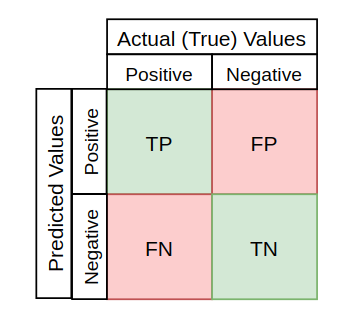

**Recall** : 

Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data. The formula for it is:



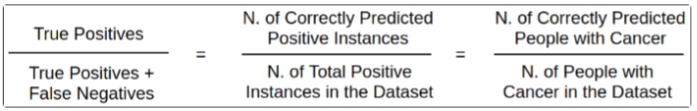

**Precision:**


Specificity is a measure of how many negative predictions made are correct (true negatives). The formula for it is:



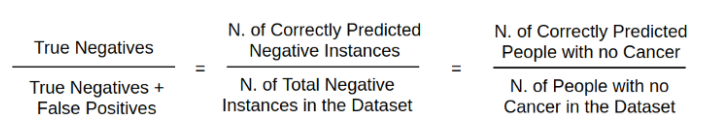

**F1-Score:**

F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two. Harmonic mean is just another way to calculate an “average” of values, generally described as more suitable for ratios (such as precision and recall) than the traditional arithmetic mean. The formula used for F1-score in this case is:


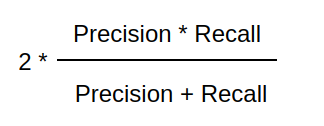

**Some advantages of F1-score:**

* Very small precision or recall will result in lower overall score. Thus it helps balance the two metrics.

* If you choose your positive class as the one with fewer samples, F1-score can help balance the metric across positive/negative samples.

* As illustrated by the first figure in this article, it combines many of the other metrics into a single one, capturing many aspects at once.

## a - Support Vector Machine

SVM (Support Vector Machine ou Machine à vecteurs de support) : Les SVMs sont une famille d’algorithmes d‘apprentissage automatique qui permettent de résoudre des problèmes tant de classification que de régression ou de détection d’anomalie. Ils sont connus pour leurs solides garanties théoriques, leur grande flexibilité ainsi que leur simplicité d’utilisation même sans grande connaissance de data mining.

Leur principe est simple : il ont pour but de séparer les données en classes à l’aide d’une frontière aussi « simple » que possible, de telle façon que la distance entre les différents groupes de données et la frontière qui les sépare soit maximale. Cette distance est aussi appelée « marge » et les SVMs sont ainsi qualifiés de « séparateurs à vaste marge », les « vecteurs de support » étant les données les plus proches de la frontière.

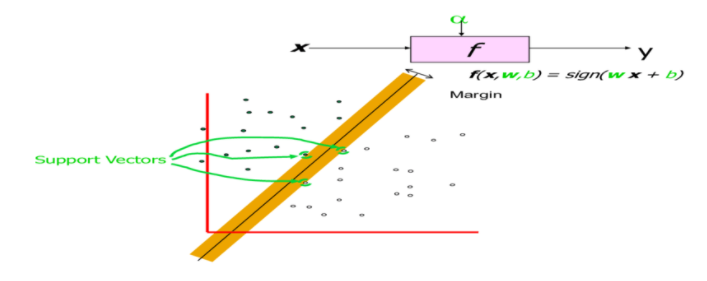

Cette notion de frontière  suppose que  les données soient linéairement séparables, ce qui est rarement le cas. Pour y pallier, les SVMs reposent souvent sur l’utilisation de « noyaux ». Ces fonctions mathématiques permettent de séparer les données en les projetant dans un feature space (un espace vectoriel de plus grande dimension, voir figure ci-dessous). La technique de maximisation de marge permet, quant à elle, de garantir une meilleure robustesse face au bruit – et donc un modèle plus généralisable.



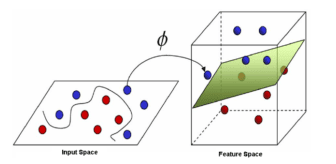

----
Applying SVM on data without Disretization perform more than using it 

----

without Discretization

In [ ]:
clf = svm.SVC()
clf.fit(x_train, y_train)
svm_ypred = clf.predict(x_test)
print(confusion_matrix(y_test,svm_ypred))
print(classification_report(y_test,svm_ypred))

[[2252  400]
 [ 804 1701]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      2652
           1       0.81      0.68      0.74      2505

    accuracy                           0.77      5157
   macro avg       0.77      0.76      0.76      5157
weighted avg       0.77      0.77      0.76      5157



Using Discretization

In [ ]:
clf = svm.SVC()
clf.fit(x_MDLPC_train, y_train)
svm_ypred = clf.predict(x_MDLPC_test)
print(confusion_matrix(y_test,svm_ypred))
print(classification_report(y_test,svm_ypred))

[[2367  285]
 [ 843 1662]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      2652
           1       0.85      0.66      0.75      2505

    accuracy                           0.78      5157
   macro avg       0.80      0.78      0.78      5157
weighted avg       0.79      0.78      0.78      5157



## a - Decision Tree

Les algorithmes de Decision tree, que l’on appelle également arbres de décision font partie de la catégorie des algorithmes supervisés, ils permettent de prédire une valeur (prédiction) ou une catégorie (classement).

Dans le cas des arbres de classification, il s'agit d'un problème de classification automatique. Le critère d’évaluation des partitions caractérise l'homogénéité (ou le gain en homogénéité) des sous-ensembles obtenus par division de l'ensemble. Ces métriques sont appliquées à chaque sous-ensemble candidat et les résultats sont combinés (par exemple, moyennés) pour produire une mesure de la qualité de la séparation.

Il existe un grand nombre de critères de ce type, les plus utilisés sont l’entropie de Shannon, l'indice de diversité de Gini et leurs variantes.


* Indice de diversité de Gini : utilisé par l'algorithme CART, il mesure avec quelle fréquence un élément aléatoire de l'ensemble serait mal classé si son étiquette était choisie aléatoirement selon la distribution des étiquettes dans le sous-ensemble. L'indice de diversité de Gini peut être calculé en sommant la probabilité pour chaque élément d'être choisi, multipliée par la probabilité qu'il soit mal classé. Il atteint sa valeur minimum (zéro) lorsque tous les éléments de l'ensemble sont dans une même classe de la variable-cible. Pratiquement, si l'on suppose que la classe prend une valeur dans l'ensemble {\displaystyle {1,2,...,m}.}{\displaystyle {1,2,...,m}.}, et si {\displaystyle f_{i}}f_{i} désigne la fraction des éléments de l'ensemble avec l'étiquette {\displaystyle i}i dans l'ensemble, on aura :

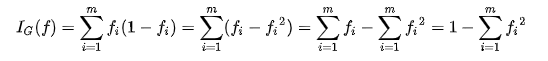

* Gain d'information : utilisé par les algorithmes ID3 et C4.5, le gain d'information est basé sur le concept d'entropie de Shannon en théorie de l'information 2. L'entropie permet de mesurer le désordre dans un ensemble de données et est utilisée pour choisir la valeur permettant de maximiser le gain d'information. En utilisant les mêmes notations que pour l'indice de diversité de Gini, on obient la formule suivante :
{\displaystyle I_{E}(f)=-\sum _{i=1}^{m}f_{i}\log _{2}^{}f_{i}}

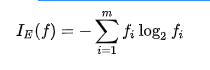

----
Applying Decision Tree on data without Disretization perform less than using it 

----

without Discretization

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
tree_ypred = dtree.predict(x_test)
print(confusion_matrix(y_test,tree_ypred))
print(classification_report(y_test,tree_ypred))

[[2057  595]
 [ 418 2087]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2652
           1       0.78      0.83      0.80      2505

    accuracy                           0.80      5157
   macro avg       0.80      0.80      0.80      5157
weighted avg       0.81      0.80      0.80      5157



Using Discretization

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_MDLPC_train, y_train)
tree_ypred = dtree.predict(x_MDLPC_test)
print(confusion_matrix(y_test,tree_ypred))
print(classification_report(y_test,tree_ypred))

[[2239  413]
 [ 676 1829]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      2652
           1       0.82      0.73      0.77      2505

    accuracy                           0.79      5157
   macro avg       0.79      0.79      0.79      5157
weighted avg       0.79      0.79      0.79      5157



## a - Random Forest

L’algorithme des « forêts aléatoires » (ou Random Forest parfois aussi traduit par forêt d’arbres décisionnels) est un algorithme de classification qui réduit la variance des prévisions d’un arbre de décision seul, améliorant ainsi leurs performances. Pour cela, il combine de nombreux arbres de décisions dans une approche de type bagging.

L’algorithme des « forêts aléatoires » a été proposé par Leo Breiman et Adèle Cutler en 2001. Dans sa formule la plus classique, il effectue un apprentissage en parallèle sur de multiples arbres de décision construits aléatoirement et entraînés sur des sous-ensembles de données différents. Le nombre idéal d’arbres, qui peut aller jusqu’à plusieurs centaines voire plus, est un paramètre important : il est très variable et dépend du problème. Concrètement, chaque arbre de la forêt aléatoire est entrainé sur un sous ensemble aléatoire de données selon le principe du bagging, avec un sous ensemble aléatoire de features (caractéristiques variables des données) selon le principe des « projections aléatoires ». Les prédictions sont ensuite moyennées lorsque les données sont quantitatives ou utilisés pour un vote pour des données qualitatives, dans le cas des arbres de classification. L’algorithme des forêts aléatoires est connu pour être un des classifieurs les plus efficaces « out-of-the-box » (c’est-à-dire nécessitant peu de prétraitement des données). Il a été utilisé dans de nombreuses applications, y compris grand public, comme pour la classification d’images de la caméra de console de jeu Kinect* dans le but d’identifier des positions du corps.

On se retrouve donc avec plusieurs arbres et donc des prédictions différentes pour chaque individu. Comment obtenir l’estimation finale : 

*  Dans le cas d’une classification : on choisit la catégorie la plus fréquente.

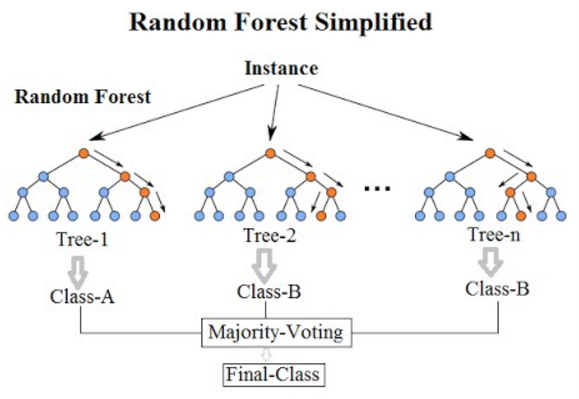

----
Applying Decision Tree on data without Disretization perform more than using it 

----

Without Discretization

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_ypred = rf.predict(x_test)
print(confusion_matrix(y_test,rf_ypred))
print(classification_report(y_test,rf_ypred))

[[2211  441]
 [ 398 2107]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2652
           1       0.83      0.84      0.83      2505

    accuracy                           0.84      5157
   macro avg       0.84      0.84      0.84      5157
weighted avg       0.84      0.84      0.84      5157



Using Discretization

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_MDLPC_train,y_train)
rf_ypred = rf.predict(x_MDLPC_test)
print(confusion_matrix(y_test,rf_ypred))
print(classification_report(y_test,rf_ypred))

[[2208  444]
 [ 617 1888]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      2652
           1       0.81      0.75      0.78      2505

    accuracy                           0.79      5157
   macro avg       0.80      0.79      0.79      5157
weighted avg       0.80      0.79      0.79      5157

